## Fashion MNIST Classification project

In [2]:
#Checking the gpu availability in mac for using torch
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [3]:
#importing dependencies 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#from prettytable import PrettyTable
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import decomposition





sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")


## Loading Fashion MNIST Dataset

In [4]:
#Load Fashion-Mnist Dataset
fashion_mnist = fetch_openml(name="Fashion-MNIST", cache = True)
fashion_mnist_df = pd.DataFrame(fashion_mnist.data, columns=fashion_mnist.feature_names)
fashion_mnist_df['target'] = fashion_mnist['target'].astype(int)
fashion_mnist_df.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,0.0,133.0,167.0,73.0,0.0,0.0,0.0,2
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
7,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,3.0,0.0,82.0,237.0,231.0,70.0,0.0,0.0,2
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [5]:
fashion_mnist_df.shape

(70000, 785)

In [6]:
#Checking missing values in the dataset
fashion_mnist_df.isnull().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel781    0
pixel782    0
pixel783    0
pixel784    0
target      0
Length: 785, dtype: int64

We see that there are no missing values in the dataset.

In [7]:
fashion_mnist_df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.00000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.00000,70000.000000,70000.000000,70000.000000
mean,0.000771,0.006414,0.034486,0.098886,0.247843,0.408714,0.802900,2.204386,5.634900,14.41000,...,23.288643,16.611600,17.823371,22.887986,17.968129,8.524043,2.75140,0.836529,0.072914,4.500000
std,0.087339,0.296605,1.200882,2.458872,4.408110,5.842288,8.186472,14.117208,23.698865,38.18827,...,48.935288,42.075046,43.901606,51.853192,45.231601,29.527900,17.38577,9.258426,2.129924,2.872302
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,7.000000
max,16.000000,45.000000,218.000000,185.000000,227.000000,230.000000,224.000000,225.000000,254.000000,255.00000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,170.000000,9.000000


In [8]:
X = fashion_mnist_df.drop('target', axis = 1).values #Get the data 28x28 total 784 features
y = fashion_mnist_df['target'].values #Get the target values or class

In [9]:
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

In [11]:
class_mapping = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
def true_label(x):
    return class_mapping[x]

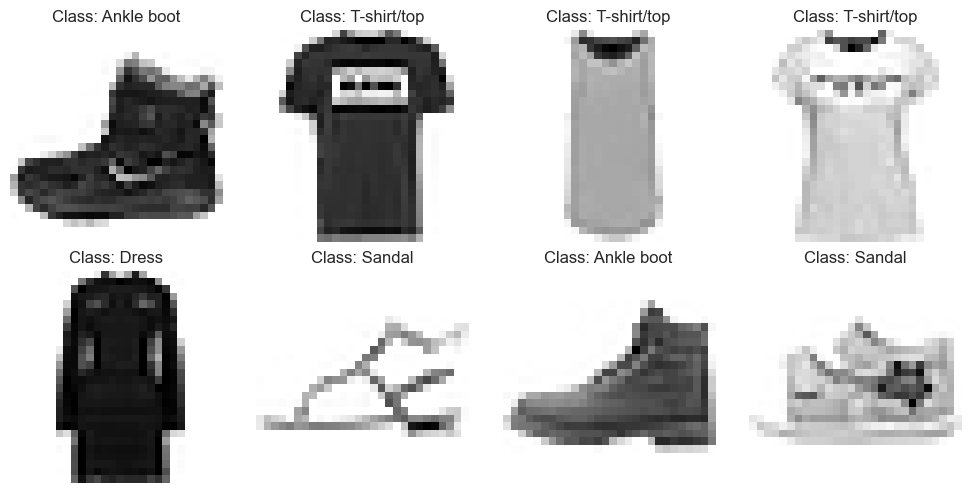

In [12]:
#Checking some data samples
plt.figure(figsize=(10, 5))
k = [0, 1, 2, 34, 500, 14578, 50000, 69999]

for i, example in enumerate(k, 1):
    plt.subplot(2, 4, i)
    g = plt.imshow(X.reshape(-1, 28, 28, 1)[example][:, :, 0], cmap=plt.cm.binary)
    plt.title('Class: ' + true_label(y[example]))
    plt.axis('off')

plt.tight_layout()
plt.show()

In [13]:
#Splitting the data into training and testing set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (60000, 784)
X_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


## Data Preprocessing

In [16]:
#Coverting the scale of pixels from 0-1 
X_train = X_train/255.0
X_test = X_test/255.0


## EDA

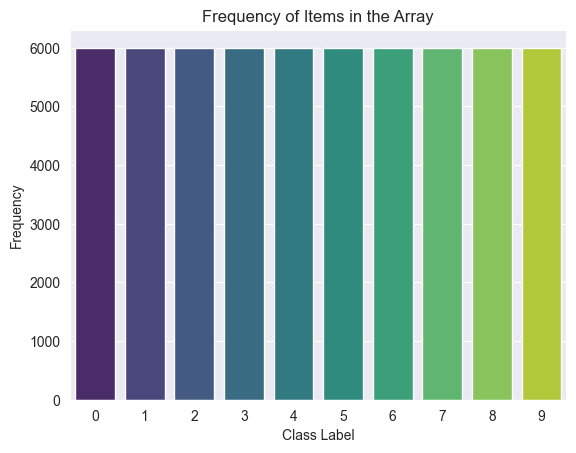

In [15]:
sns.countplot(x = y_train, palette="viridis")

plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.title("Frequency of Items in the Array")

# Show the plot
plt.show()